<------------------------------------------------------------------------------------------------------------------------>
IDENTIFICATION DIVISION.
PROGRAM-ID DATACLEAN.
DATE: 11/13/2024 TO 11/16/2024
AUTHOR: CATARINA CORREIA DA COSTA 
STUDENTID: A048002
<------------------------------------------------------------------------------------------------------------------------>

Começo por importar as bibliotecas necessárias como as seguintes: 
pandas e numpy para análise de dados e constituição de dataframe para limpeza de dados.
re para cáclulos que possa precisar para obtenção de mais dados que possam parecer relevantes á investigação.

In [1]:
import pandas as pd
import numpy as np
import re as re

Seguidamente, nos ficheiros que nos foram fornecidos, encontrava-se um ficheiro .txt com details. 
Fiz um pequeno pedaço de código que me pernmitisse ler esse ficheiro e apresentar-me o seu conteúdo (imprimir linhas do mesmo). Achei que não seria por acaso que o mesmo estaria aqui, também fora alvo de conteúdo de dados relevantes. Poderia dar-me mais dados sobre o contexto do acontecimento, por exemplo. 

In [2]:
 # Mostrar txt e mostrar texto nele contido.
try:
    with open("details.txt", "r", encoding="utf-8") as file:  # ficheiro txt a ler
        lines = file.readlines()
    
    # Mostrar as primeiras linhas do ficheiro
        print(lines)
        
except FileNotFoundError:
    print("Error: The file 'details.txt' was not found. Please check the file path.")
except UnicodeDecodeError:
    print("Error: Unable to decode the file. Try specifying a different encoding (e.g., 'utf-8' or 'ISO-8859-1').")
except PermissionError:
    print("Error: Permission denied. Ensure the file is not locked or being used by another program.")

['Description:\n', '\n', 'The sinking of the Titanic is one of the most infamous shipwrecks in history.\n', '\n', 'On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.\n', '\n', 'While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.\n', '\n', 'In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).\n', 'Acknowledgements:\n', '\n', 'This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.\n', '\n', 'For more details, check also: https://www.kaggle.com/datasets/yasserh/titanic-dataset\n']


Após análise do conteúdo dass linhas, encontro algumas informações que mais tarde me irão servir para o dataset, tais como:
- número de pessoas que morreram;
- Total de pessoas a bordo.
Feita a busca e o match com a informação a mesma é armazenada em variavel e impressa. O dataset poder+a nçao conter todas as informañçoes e ter o número total de pessoas abordo (passageiros e tripulação), tal como o número total de mortos, nos mesmos moldes, poderei efectuar outros cálculos mais tarde como a taxa de sobrevivência. 

In [3]:
#Informacao retirada do txt 
#total de pessoas a bordo e de mortos
#import re

# Dados obtidos txt anteriormente

description = """
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
"""

# Procurar números relevantes 
died_pattern = r"death of (\d+) out of (\d+) passengers"
match = re.search(died_pattern, description)

if match:
    # Procurar match com a informação relevante 
    died = int(match.group(1))  # Number of people who died
    total = int(match.group(2))  # Total number of people on board

    print(f"Total number of people on board: {total}")
    print(f"Number of people who died: {died}")
else:
    print("Data not found in the text")


Total number of people on board: 2224
Number of people who died: 1502


Para além das informações acima retiradas do texto, podemos encontrar mais informaçã relevante como:
- data do acontecimento
- problema e a descrição do mesmo
- Questão da investigação
Este pedaço de códgico busca esses elementos e se tiver um match ele guarda em variavel e imprime. Estas informações podem guiar a investigação, pois a pergunta e a descrição do problema é o nosso ponto de partida para podermos analisar os dados e tirar as primeiras conclusões.

In [4]:
#import pandas as pd

# Dados do ficheiro txt
description = """
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
"""

# Extração da data,do problema e da questão de investigação
date = "April 15, 1912"
Problem= "RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,"
question_of_study = "What sorts of people were more likely to survive the sinking of the RMS Titanic?"

# Definir os dados em forma de dicionário
data = {
    'Date': [date],
    'Problem':[Problem],
    'Question_of_Study': [question_of_study]
}

# Criar  DataFrame
df = pd.DataFrame(data)

# Apresentar  DataFrame
print(df)


             Date                                            Problem  \
0  April 15, 1912  RMS Titanic sank after colliding with an icebe...   

                                   Question_of_Study  
0  What sorts of people were more likely to survi...  


Com o ficheiro dataset de origem começo por ler o mesmo e imprimir as primeiras linhas para ver como está organizado. Porque o dataset, transformado em dataframe, será a nossa ferramenta de trabalho principal, pois contém os dados originais que irão ser usados na nossa análise. Saber como estão organizados irá facilitar esse processo.

WORKING-STORAGE SECTION.

In [5]:
# ler csv e mostrar algumsas linhas 

#import pandas as pd 

df = pd.read_csv("Titanic-Dataset - copia.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Peço para me listar todas as variáveis do dataset, conhecendo as diferentes variáveis saberei com que dados estarei a lidar e também como saber trabalhar com eles. Dando um panorama geral sobre o conteúdo da tabela (variáveis a considerar).

DATA DIVISION.

In [6]:
#variaveis do dataset
#import pandas as pd

# Ler dataset 
df = pd.read_csv('Titanic-Dataset - copia.csv')

# Apresentar o nome das colunas (variaveis)
print("Variables in the dataset:", df.columns)


Variables in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Peço também os tipos de dados que as colunas têm para saber se estão corretos os valores introduzidos. O datatype vai permitir saber que tipo de dados tem cada coluna e saber se o tipo é adequado ao pretendido para essa variável. 

In [7]:
print("Column data types:\n", df.dtypes) # msostrar tipos de dados das coluinas


Column data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Peço informação completa do dataset para ver por onde começo a limpar (valores nulos,memória,número de colunas e linhas total).  A informação completa da tabela permite-me saber se tenho valores em falta, tipo de dads e extensão total da mesma em colunas e linhas. 


       PROCEDURE DIVISION.

In [8]:
print(df.info())  #mostrar toda a informação da tabela 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Começo a limpeza de dados: a contagem de valores nulos e onde eles se encontram na tabela, para decidir o que fazer deles. Os valores NAN e Nulos são células vazias que se podem encontrar na tabela, esses valores não têm valores e devemos decidir o que fazer com eles (nomeadamente eliminar ou preencher de outras formas). Dependendo do número de registos em falta essa decisão pode pender para algum dos lados. Além disso, esses valores podem atrapalhar quando prosseguimos para a análise de dados.

In [9]:
#Nan and null what i do?
#import pandas as pd

# Ler dataset
# df = pd.read_csv('Titanic-Dataset - copia.csv')

# Contar os valores omissos em cada coluna
nan_counts = df.isna().sum()

# Mostrar quantos valores estão omissos e as colunas a que eles correspondem
print("NaN values per column:")
print(nan_counts[nan_counts > 0])

NaN values per column:
Age         177
Cabin       687
Embarked      2
dtype: int64


Ao verificar onde se localizavam os valores nulos e a sua quantidade em Age, Cabin, Embarked para poder tomar decisões sobre eles mais á frente. 
Aqui tentei que a coluna name fosse dividida em lastname firstname (apelido e nome próprio ) para ser nmais preceptível os constituintes do nome, além de isolar mais á frente eo título  familiar.
Ao mesmo tempo, na mesma coluna se apagasse espaço em branco a mais, com intuito  de formatar (uniformatização).
Adicionei uma coluna de tamanho da familia que ajuda a entender quantas famílias completas iam na viagem e quantos da família sobreviveram (cálculos ainda a realizar). Para saber o tamanho da família pelo mesmo Sibsp e Parch que nos mostram quantas pessoas se sentaram da mesma família. 
O que me pode mostrar se houver famílias com mais do que um elemento que a maioria dos passageiros devem ser adultos.

In [10]:
#import pandas as pd
#import numpy as np

# ler dataet
#df = pd.read_csv("Titanic-Dataset - copia.csv")

#Apresentar o dataframe inicial
print("Original DataFrame:\n", df.head())

# split name em lastname e firstname

df[['LastName', 'FirstName']] = df['Name'].str.split(',', expand=True)
#limpar espaços em branco extra

df['FirstName'] = df['FirstName'].str.strip()

#Adicionar a coluna tamanho da família para saber quantas pessoas eram da mesma família

if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
else:
    print("Error: 'SibSp' or 'Parch' column is missing, cannot compute 'FamilySize'.")
    
# Mostrar as alterações feitas no dataframe
print("\nTransformed DataFrame:\n", df.head())

Original DataFrame:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

Neste passo, regressei á contagem de Nulls e NAN que já tinha feito no início. Pata poder trabalhar com eles.

In [11]:
# Contagem dos valores nulos (None, NAN)
# leitura do CSV 
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Contagem  NaN/None valores em cada coluna

nan_count_per_column = df.isna().sum()

# Contagem dos  NaN/None valores em todo o  DataFrame

nan_count_total = df.isna().sum().sum()

# Mostrar as contagens 

print("NaN/None values per column:")
print(nan_count_per_column)

print("\nTotal NaN/None values in the DataFrame:", nan_count_total)



NaN/None values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
LastName         0
FirstName        0
FamilySize       0
dtype: int64

Total NaN/None values in the DataFrame: 866


Segundo a tabela acima temos valores nulos nas seguintes tabela:
-Age 
-Embarked
- Cabin
Momento de decisões...... hummmm que faço?
Eliminar todas as linhas com nulls perderia imensa informação, até de outras colunas. 
Ora bem, o mais pequeno embarked posso ir pelo valor mais frequente (mode), porque é o valor mais comum e também faltam menos registos.
Age - temos dois problemas tem o datatype errado float podemos ver mais acima e tem valores nulos.
Como quero resolver ambos os problemas (passar a integer e usar a média para completar os nulls) - Porquê a média porque como vimos antes com o tamanho das famílias, a maioria dos passageiros são adultos. 
cabin? - pois esse vai ser mais difícil, pois precisarei de outros elementos do dataset para a completar.

In [12]:
#import pandas as pd

# Ler ficheiro CSV
#df = pd.read_csv('Titanic-Dataset - copia.csv')

#´Preencher valores omissos em Age com a média e converter em número inteiro

df['Age'] = df['Age'].fillna(df['Age'].median()).round().astype(int)

#Preencher valores omissos em Embarked com mode (valor mais frequente)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Verificar se aiinda existem valres omissos

print("\nMissing values after handling:")
print(df.isna().sum())


#Mostrar novo dataframe com as alterações

print("\nUpdated DataFrame:")
print(df.head())






Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
LastName         0
FirstName        0
FamilySize       0
dtype: int64

Updated DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry 

Falatavam só os NAN do ^Cabin e gostava de ver onde se localizavam (linhas) na tabela.
E ajudou-me a reparar no ticket e no deck e a sua relação com cabin.

In [13]:
#NULL na coluna cabin

df[df['Cabin'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr. Henry Jr,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,NaN,Q,Rice,Mrs. William (Margaret Norton),6
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie""",4


Reparando na relação entre as três variáveis tive uma ideia para resolver o problema de cabin ter valores nulos decidi recorrer ao ticket. Este é composto normalmente por uma letra e um conjunto de números, a letra corresponde ao deck e á cabine. Tenho uma lista anterior dos decks válidos e vou transformar o bilhete (ticket) em string e verificar se a letra extraida  corresponde com um deck válido. Caso simm, preenche deck+cabin, caso não fica os dados do bilhete.
Apago a coluna ticket-deck que usei na correspondência e imprimo o dataframe atualizado.

In [14]:

#import pandas as pd

# Leitura do csv
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Transformação da coluna Ticket em string 
df['Ticket'] = df['Ticket'].astype(str)

# Extrair a primeira letra que corresponda com o deck e colocar em maiuscula 
df['Ticket_Deck'] = df['Ticket'].str[0].str.upper()

# Verificar se corresponde a um deck
valid_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df['Ticket_Deck'] = df['Ticket_Deck'].apply(lambda x: x if x in valid_decks else None)

# Preencher com o valor do ticket em caso de ser inválido ou não existir
df['Cabin'] = df['Cabin'].fillna(df['Ticket_Deck'])

df.drop(columns=['Ticket_Deck'], inplace=True)

# Mostrar dataframe atualizado
print(df)

#Vou verificar se ainda existem valores nulos nessa coluna
print(df['Cabin'].isnull().sum())


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ... 

Devido á existência de muitos valores nulos, mesmo após a ajuda dada pelo ticket, optei por passar a unknown esses valores para não perder as linhas na eliminação de dados. Assim, passam a não contabilizados. Esses valores NAN pertencem a tickets que não tinham deck ou cabin associado. Era somente um número sem a letra string inicial [0], daí usar o unknown para não ser contabilizado como valor vazio.

In [15]:

#Substitui NAN and NONE for Unknown

#import pandas as pd

# Ler o csv
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Substituir NaN  na coluna  'Cabin' por 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Passar todos os elementos as maíusculas
df['Cabin'] = df['Cabin'].apply(lambda x: x.upper())

print("\nDataFrame after filling NaN values and transforming 'Cabin':")
print(df.head())




DataFrame after filling NaN values and transforming 'Cabin':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked   LastName  \
0      0         A/5 21171   7.2500        A        S     Braund   
1      0          PC 17599  71.2833      C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250  UNKNOWN        S  Heikk

Como podemos verificar, foi utilizado o número de ticket, este é composto por números que indicam o acento e letras correspondem ao deck e este por sua vez corresponde a uma cabine, exemplo   A/5 21171  é a cabine A e o deck A.
Assim,pude preencher alguns dos valores nulos, no entanto, nem todos os números de bilhete possuiam cabine, por isso passaram a none e para não serem contabilizados terei que os passar a unknown e assim completar a deck colum e alterar o dataframe de forma a eliminar nulos sem seleimnar linhas completas.
Porque se as eliminasse perderia outros dados relevantes e este poderá não o ser, mas não perco os restantes eliminando linhas ou a coluna.

In [16]:
#Ignorar UnKnown

# Mostrar primeiras linhas para verificar os dados iniciais

print("Initial DataFrame:")
print(df.head())

#Extrair a primeira letra dos elementos de cabin ignorando (NAN e None)

df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else x)
#A primeira letra de Cabin é considerado o deck 

#A primeira letra de Cabin é considerado o deck 

df['Deck'] = df['Cabin'].str[0]  

#Mostrar as alterações no dataframe

print("\nDataFrame after processing 'Cabin' column:")
print(df.head())



Initial DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked   LastName  \
0      0         A/5 21171   7.2500        A        S     Braund   
1      0          PC 17599  71.2833      C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250  UNKNOWN        S  Heikkinen   
3      0            113803  53.1000

In [17]:
#Títulos de famílias -filtrar

def filter_by_titles(titles):
    """
    Filter the global DataFrame to include only rows where the 'Title' column matches the specified titles

    Args:
        titles (list): List of titles to filter (e.g., ['Miss', 'Mr', 'Mrs']).

    Returns:
        pd.DataFrame: A DataFrame containing only rows with the specified titles.
    """
    
    global df
    
    #Extrair títulos de nome
    df['Title'] = df['Name'].str.extract(r'\b(' + '|'.join(titles) + r')\b', expand=True)

    # Restringir-me ás colunas onde se localizam os títtulos = nome
    return df[df['Title'].isin(titles)]

# Lista de títulos a procurar
desired_titles = ['Miss', 'Mr', 'Mrs', 'Dr', 'Master']

#  DataFrame - filtrar e procurar 
filtered_df = filter_by_titles(desired_titles)

# Mostrar os valores retirados do dataframe coluna nome titulo
print(filtered_df[['Name', 'Title']])

                                                  Name Title
0                              Braund, Mr. Owen Harris    Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                               Heikkinen, Miss. Laina  Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                             Allen, Mr. William Henry    Mr
..                                                 ...   ...
885               Rice, Mrs. William (Margaret Norton)   Mrs
887                       Graham, Miss. Margaret Edith  Miss
888           Johnston, Miss. Catherine Helen "Carrie"  Miss
889                              Behr, Mr. Karl Howell    Mr
890                                Dooley, Mr. Patrick    Mr

[874 rows x 2 columns]


Foi criada uma lista de títulos familiares extraída de nomes, pode ser mais um dado promenor que explica a sorte de sobreviver, que iremos ver mais á frente.  
São dados que podem mais tarde explicar a sorte e também o estatuto socio económico do documento details.

Quis ver todod o dataframe completo

In [18]:
#import pandas as pd
# ver database completo
pd.options.display.max_rows = None
pd.options.display.max_columns=None

#df = pd.read_csv('Titanic-Dataset - copia.csv')

print(df) 


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

Vamos começar por verificar e eliminar duplicados, porque é outro passo na limpeza de dados para não haver registos repetidos. 

In [19]:
# Duplicados
print(df.duplicated())
df.drop_duplicates(inplace = True)


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
#Read datatypes origin 
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
LastName        object
FirstName       object
FamilySize       int64
Deck            object
Title           object
dtype: object


Parece que não há registos repetidos. Agora vamos ver de novo os datatypes de origem de cada coluna para ver se estão de acordo com os dados inseridos. Se não estiverem de acordo serão redefenidos e a memória utilizada também.

In [21]:
#import pandas as pd
# Mudar os datatypes
# Ler dataset e mostrar datatypes atuais
#df = pd.read_csv('Titanic-Dataset - copia.csv')
print("Original Data Types:")
print(df.dtypes)

# Redefinição de datatypes
df = df.astype({
    'Pclass': 'int8',      
    'Age': 'int8',      
    'SibSp': 'int8',    
    'Parch': 'int8',       
    'Fare': 'float32',     
    'Sex': 'category',     
    'Embarked': 'category' 
})

# Verificar
print("\nRedefined Data Types:")
print(df.dtypes)

# Guardar na memória
print("\nMemory Usage (Reduced):")
print(df.memory_usage(deep=True))




Original Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
LastName        object
FirstName       object
FamilySize       int64
Deck            object
Title           object
dtype: object

Redefined Data Types:
PassengerId       int64
Survived          int64
Pclass             int8
Name             object
Sex            category
Age                int8
SibSp              int8
Parch              int8
Ticket           object
Fare            float32
Cabin            object
Embarked       category
LastName         object
FirstName        object
FamilySize        int64
Deck             object
Title            object
dtype: object

Memory Usage (Reduced):
Index            132
PassengerId     7128
Survived        7128
Pclass           891
Name           67685

In [22]:
#Imprimir toda a informação da tabela 
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
dtypes: category(2), float32(1), int64(3), int8(4), object(7)
memory usage: 78

Formatar Strings para elas ficarem uniformes. Como tinhamos formatado last name e first nam, faremos o mesmo para as restantes strings. 

In [23]:
#format strings

df['Name'] = df['Name'].str.title() 
df['Sex'] = df['Sex'].str.lower()
df['Cabin'] = df['Cabin'].str.title()
df['Ticket'] = df['Ticket'].str.title() 
print(df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

Vamos verificar as primeiras linhas para ver se ficou com a formatação pretendida. Verificar se está tudo correto como foi feito até aqui de passos na limpeza dos dados. 

In [24]:
#Imprimir algumas linhas 
#import pandas as pd
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,FamilySize,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,A,S,Braund,Mr. Owen Harris,2,A,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,Pc 17599,71.283302,C,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),2,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,Ston/O2. 3101282,7.925000,U,S,Heikkinen,Miss. Laina,1,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.099998,C,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),2,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,U,S,Allen,Mr. William Henry,1,U,Mr


Outro dado que considero importante para a investigação é saber qual era o número total de passageiros do Titanic.O total de passageiros é o mesmo do total de linhas do nosso dataset, pode ser útil em cálculos futuros como sobrevivência e não sobrevivência.

In [25]:
#import pandas as pd
#Número de passageiros 
#  Ler o csv dataset
# df = pd.read_csv('Titanic-Dataset - copia.csv')

# Calcular o total de passageiros do navio
total_passengers = len(df)
print(f"Total number of passengers on board: {total_passengers}")



Total number of passengers on board: 891


No documento txt tinha a informação do total de pessoas que estavam no navio (tripulantes e passageiros) com esse dado e o que obtive no passo anterior poderei Também pretendo saber quantos tripulantes iriam abordo do mesmo navio. Esses dados serão importantes em cálculos e também em visualização.

In [26]:
#Número de tripulantes
total_crew =total - total_passengers
print(total_crew)

1333


<------------------------------------------------------------------------------------------------------------------------>
É apresentada a confirmação de gravação do mesmo e de duas mensagens com algum humor no final.
Considerações foi divertido este jogo de lógica e procura de padrões. 
<------------------------------------------------------------------------------------------------------------------------>

In [27]:
#Verificar se existem valores nulos e gravar novo CSV
print("\nMissing values after handling:")
print(df.isna().sum())


output_csv_path = "cleaned_data2new.csv"  
df.to_csv(output_csv_path, index=False)

#Confirmar a gravação
print(f"Cleaned data saved to {output_csv_path}")
print("I turn MSUD 2 to code")
print("stop run")


Missing values after handling:
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
LastName        0
FirstName       0
FamilySize      0
Deck            0
Title          17
dtype: int64
Cleaned data saved to cleaned_data2new.csv
I turn MSUD 2 to code
stop run


     <--------------------------------------- SEGUNDA PARTE - VISUALIZAÇÃO E ANÀLISE --------------------------------->

Nesta secção, iremos fazer de forma gráfica a visualização dos dados e também a análise dos mesmos de forma a chegar á resposta á pergunta de investigação: Como alguns passageiros tiveram mais sorte em sobreviver do que outros?
Analisando o número total de registos na tabela (número de passageiros), acompanhado com os dados obtidos com o detils.txt e cálculos feitos anteriormente (total, died, total_crew) verifico que a tabela não contém todas as pessoas que estaavam no navio. Quero averiguar quem da tripulação sobreviveu e não consta no dataset. Pegando no total de pessoas do navio, subtraio as mortas total e fico com as que sobreviveram. 
A essas retiro a soma de survied (1) do dataset e fico com crew_survived
As falecidas restantes retiro a soma de did not survied (0) e sobra-me o crew_motsuirvied 
Fico curiosa em saber se existe diferença na percentagem de sobrevivencia entre os dois e existe, sendo que os pasageiros têm uma taxa maior de não ter sobrevivido, talvez pela falta de prpeparação, aviso,  equipamento salva-vidas.

In [28]:
# Dados fornecidos
total 
died 
registered_in_dataframe = len(df)

# Cálculo do número de registros faltantes
missing_records = total - registered_in_dataframe

# Sobviventes e não sobreviventes no DataFrame
survived_in_df = df["Survived"].sum()
not_survived_in_df = len(df) - survived_in_df

# Mortos da tripulação
crew_died = died - not_survived_in_df

# Sobreviventes da tripulação
crew_survived = missing_records - crew_died

# Total da tripulação
total_crew = missing_records

# Porcentagens
percent_survived_in_df = (survived_in_df / registered_in_dataframe) * 100
percent_not_survived_in_df = (not_survived_in_df / registered_in_dataframe) * 100
percent_crew_died = (crew_died / total_crew) * 100
percent_crew_survived = (crew_survived / total_crew) * 100

# Exibir resultados
print(f"Total de registros faltantes: {missing_records}")
print(f"Sobvreviventes no DataFrame: {survived_in_df} ({percent_survived_in_df:.2f}%)")
print(f"Não sobreviventes no DataFrame: {not_survived_in_df} ({percent_not_survived_in_df:.2f}%)")
print(f"Mortos da tripulação: {crew_died} ({percent_crew_died:.2f}%)")
print(f"Sobvreviventes da tripulação: {crew_survived} ({percent_crew_survived:.2f}%)")


Total de registros faltantes: 1333
Sobvreviventes no DataFrame: 342 (38.38%)
Não sobreviventes no DataFrame: 549 (61.62%)
Mortos da tripulação: 953 (71.49%)
Sobvreviventes da tripulação: 380 (28.51%)


Gostaria de ver a quantidade de sobreviventes ou não de forma mais visual com este gráfico. Mais de 200 pessoas de diferença entre sobreviventes e não. Haveria défice de algo para que estas pessoas não tenham sobrevivido (61.62% vs 38.38%) e a tripulação a diferença ainda é mais abismal (71.49% vs 28.52%) será que ajudando os passageiros algtuns ficaram no navio até se afunndar?

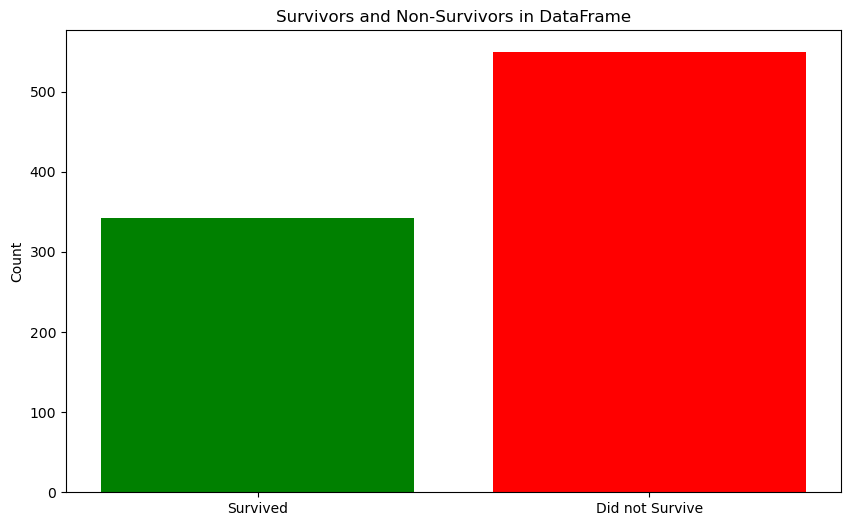

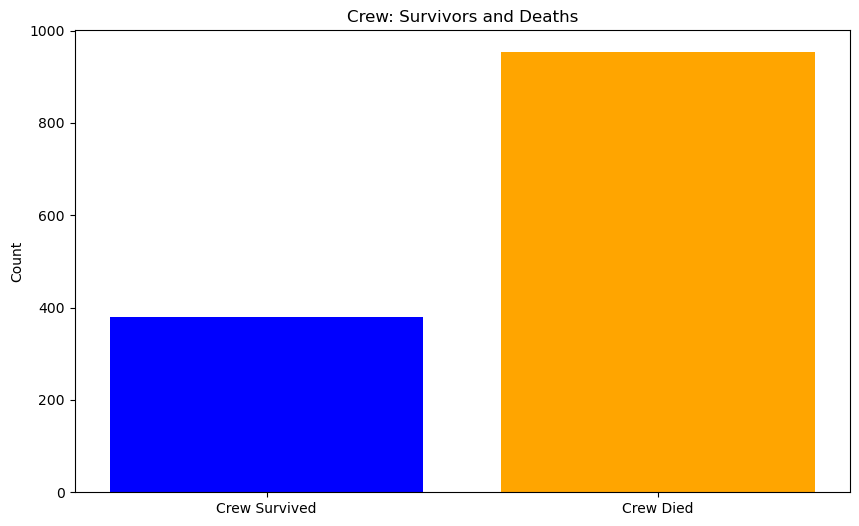

In [30]:
# Visualização 1: Sobreviventes e não sobreviventes no DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_counts = [survived_in_df, not_survived_in_df]
labels = ['Survived', 'Did not Survive']
colors = ['green', 'red']

plt.bar(labels, df_counts, color=colors)
plt.title('Survivors and Non-Survivors in DataFrame')
plt.ylabel('Count')
plt.show()

# Visualização 2: Sobreviventes e mortos da tripulação
plt.figure(figsize=(10, 6))
crew_counts = [crew_survived, crew_died]
crew_labels = ['Crew Survived', 'Crew Died']
crew_colors = ['blue', 'orange']

plt.bar(crew_labels, crew_counts, color=crew_colors)
plt.title('Crew: Survivors and Deaths')
plt.ylabel('Count')
plt.show()

Tendo em conta que haverá alguma explicação para que alguns tenham tido a grande sorte de se salvar, pode ser pelo título familiar,que dando estatuto á pessoa lhe permita ser salvvo pela sua importância real ou burguesa. Filtrarei toodos os títulos e reuno numa coluna.  Os nomes que não tinham título o mesmo foi substituído por unkown para não ser contabilizado.

In [31]:
#Títulos de famílias -filtrar
# Define the function to filter the dataset by titles
def filter_by_titles(titles):
    """
    Filter the global DataFrame to include only rows where the 'Title' column matches the specified titles

    Args:
        titles (list): List of titles to filter (e.g., ['Miss', 'Mr', 'Mrs']).

    Returns:
        pd.DataFrame: A DataFrame containing only rows with the specified titles.
    """
    
    global df
    
    # Extrair títulos de nome
    df['Title'] = df['Name'].str.extract(r'\b(' + '|'.join(titles) + r')\b', expand=True)

    # Substituir valores NaN (títulos que não corresponderam) por "Unknown"
    df['Title'] = df['Title'].fillna('Unknown')

    # Restringir-se às colunas onde se localizam os títulos (nome)
    return df[df['Title'].isin(titles + ['Unknown'])]

# Lista de títulos a procurar
desired_titles = ['Miss', 'Mr', 'Mrs', 'Dr', 'Master']

# DataFrame - filtrar e procurar
filtered_df = filter_by_titles(desired_titles)

# Mostrar os valores retirados do dataframe coluna 'Name' e 'Title'
print(filtered_df[['Name', 'Title']])


                                                  Name    Title
0                              Braund, Mr. Owen Harris       Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      Mrs
2                               Heikkinen, Miss. Laina     Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      Mrs
4                             Allen, Mr. William Henry       Mr
5                                     Moran, Mr. James       Mr
6                              Mccarthy, Mr. Timothy J       Mr
7                       Palsson, Master. Gosta Leonard   Master
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      Mrs
9                  Nasser, Mrs. Nicholas (Adele Achem)      Mrs
10                     Sandstrom, Miss. Marguerite Rut     Miss
11                            Bonnell, Miss. Elizabeth     Miss
12                      Saundercock, Mr. William Henry       Mr
13                         Andersson, Mr. Anders Johan       Mr
14                Vestrom, Miss. Hulda A

Será que .por terem determinado título, têm mais probabiblidade de sobreviver ao naufrágio?  O gráfico abaixo mostra a distribuição de sobreviventes e não sobreviventes  por título nobiário.  Verificamos que Mrs e Miss foram mais sobreviventes, talvez pela idade miss e mrs para salvar os filhos.

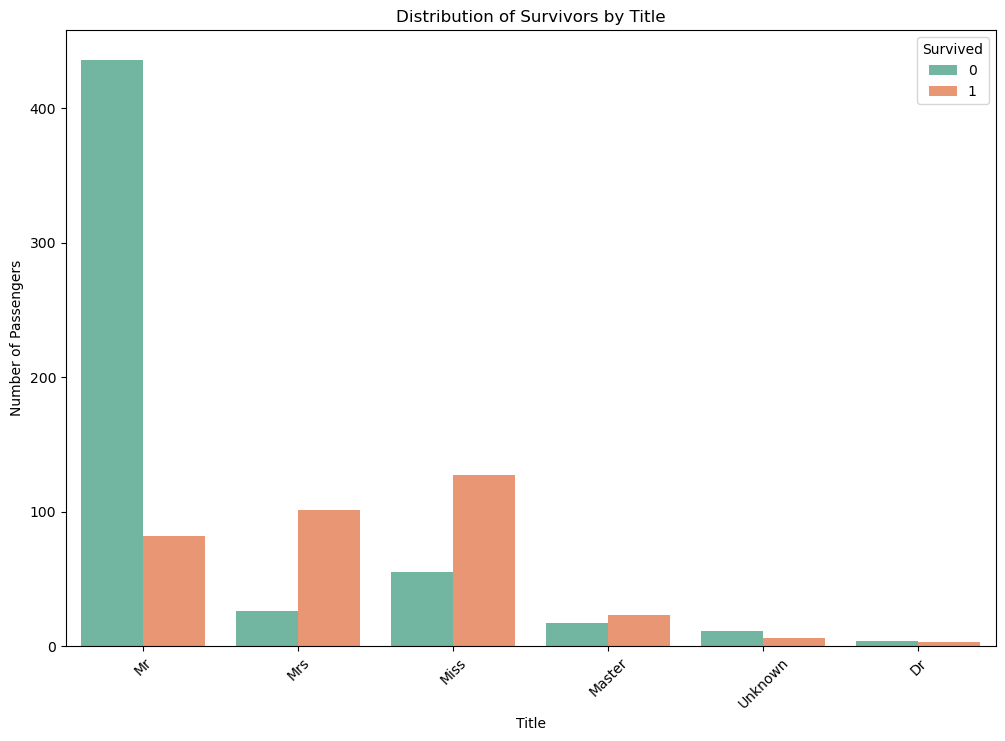

In [32]:
import seaborn as sns
# Filtrar pelo título e contar a distribuição de sobreviventes (0 e 1)
plt.figure(figsize=(12, 8))

# Usando 'hue' para diferenciar as categorias de sobreviventes (0 e 1)
sns.countplot(x='Title', hue='Survived', data=df, palette='Set2')

# Customizar o gráfico
plt.title('Distribution of Survivors by Title')  # Título do gráfico
plt.xlabel('Title')  # Rótulo do eixo X
plt.ylabel('Number of Passengers')  # Rótulo do eixo Y
plt.xticks(rotation=45)  # Rotacionar os rótulos no eixo X para melhor visualização

# Exibir o gráfico
plt.show()

Os passageiros estavam sentados em diferentes classes dentro do navio o que tinham acessso a partes do mesmo a diferentes distâncias, consoante o bilhete pago. Poderemos ver visualmente que a terceira classe teve mais falecidos do que a primeira e a segunda classes juntas. Acredito que isso tenha ligação com o estrato social dos passageiros (título).

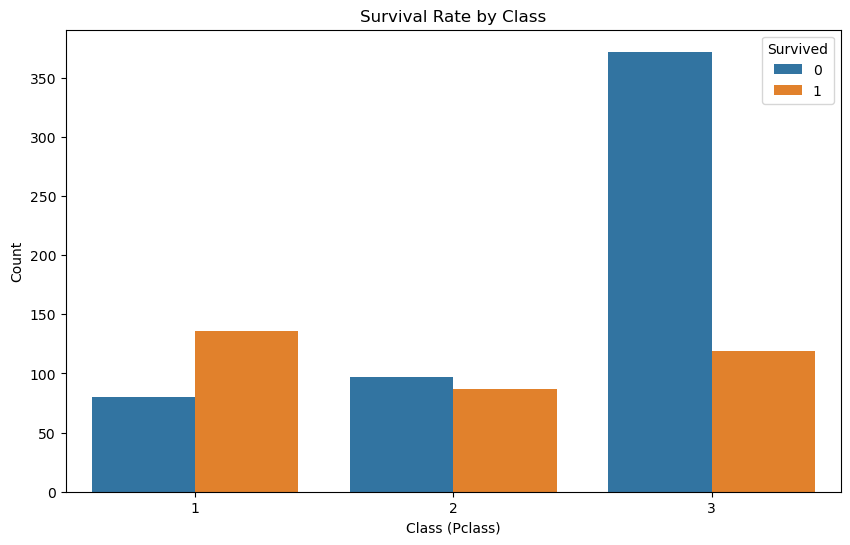

In [33]:
# Plot survival rate by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('Class (Pclass)')
plt.ylabel('Count')
plt.show()


A idade poderá ser um fator determinante para o sucesso da sobrevivência porque a mesma te dá autonomia e robustez física para aguentar todo o esforço e adrenalina. A maioria dos passageiros tinha 30 anos, ainda que haja pessoas de meses a 80 anos. A maioria eram adultos entre os 15 e os 35 anos. Em Portugal o 1º registo de esperança de vida médio foi em 820 de 35,6 anos. 

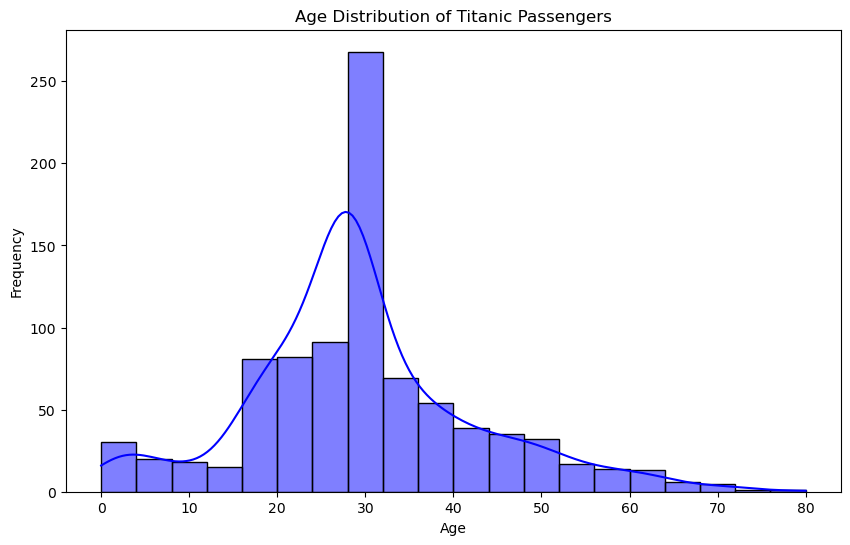

In [34]:

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Fizemos um gráfico de pontos que correlaciona a sobrevivência com a idade. Verifico que acima dos sessenta é mais raro a sobrevivência. 

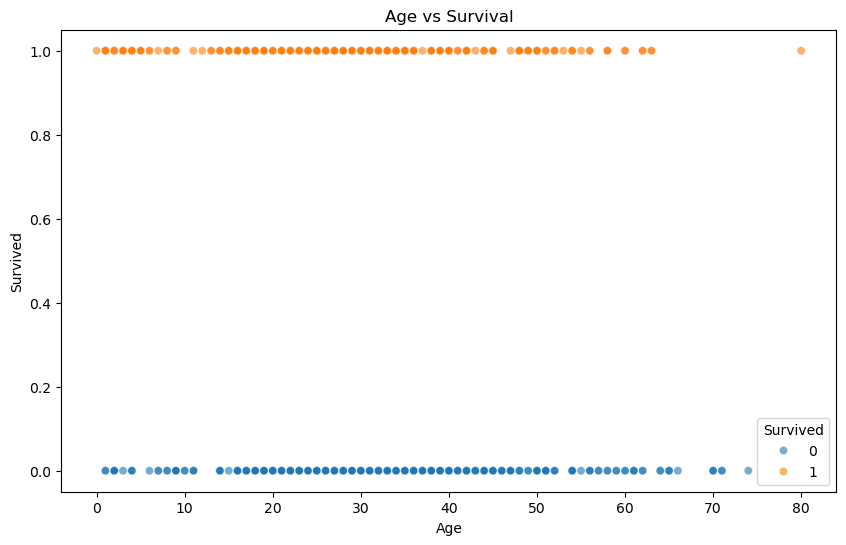

In [35]:
# Scatter plot of Age vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Survived', hue='Survived', alpha=0.6)
plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


As famílias estavam distribuídas por decks como foi visto no dataset, vamos ver se isso difere na sobrevivência. Verificamos que em alguns era 50%/50% noutros havia mais probabilidade 75% de te salvares e noutros de morrer, talvez pela sua proximidade a uma das pontas do barco ou dos botes salva vidas.

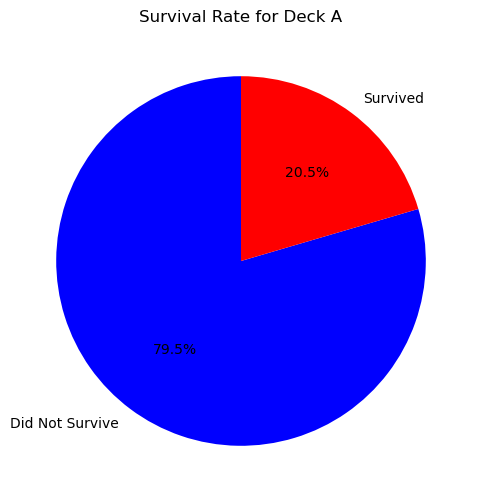

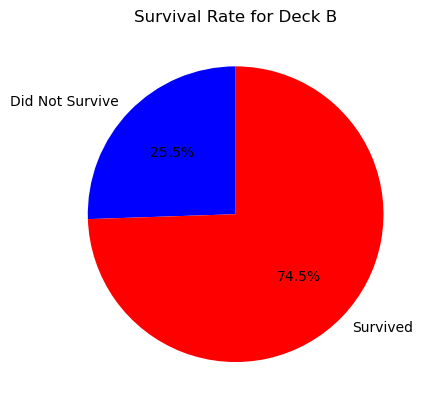

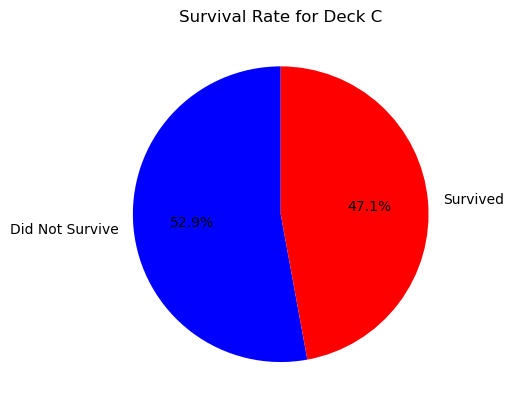

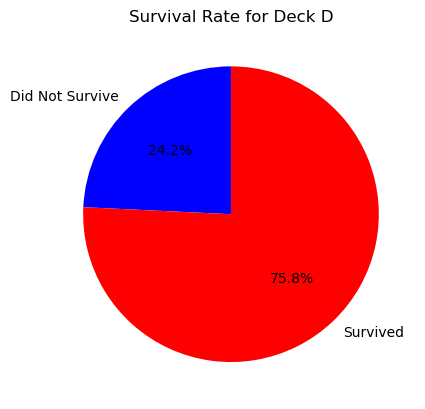

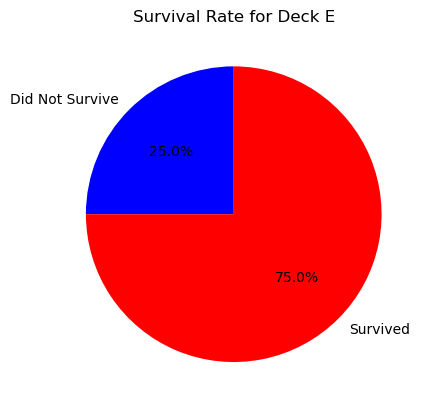

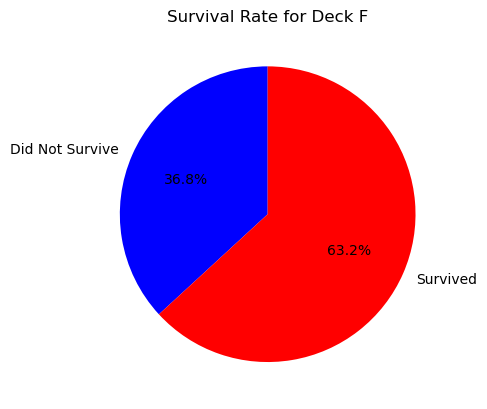

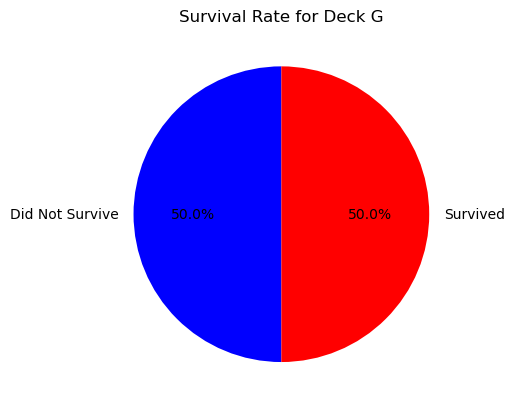

ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [36]:
# Extract Deck information from Cabin
df['Deck'] = df['Cabin'].str[0]

# Count the number of survivors and non-survivors by Deck
deck_survival = df.groupby(['Deck', 'Survived']).size().unstack()

# Plot the pie chart for each deck
plt.figure(figsize=(10, 6))

for deck in deck_survival.index:
    survival_counts = deck_survival.loc[deck]
    
    # Create a pie chart for each deck's survival distribution
    plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
    
    # Title for each deck's pie chart
    plt.title(f'Survival Rate for Deck {deck}')
    
    # Display the pie chart
    plt.show()


A idade média tanto de vivos como mortos confirma que na maioria foram adultos como vimos no primeiro gráfico com as age. Por isso quando preenchi as Nan de age usei a média e fiz correcto. 

C:\Users\Paddington\AppData\Local\Temp\ipykernel_14376\608203876.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_age_by_survival.index, y=mean_age_by_survival.values, palette=colors)


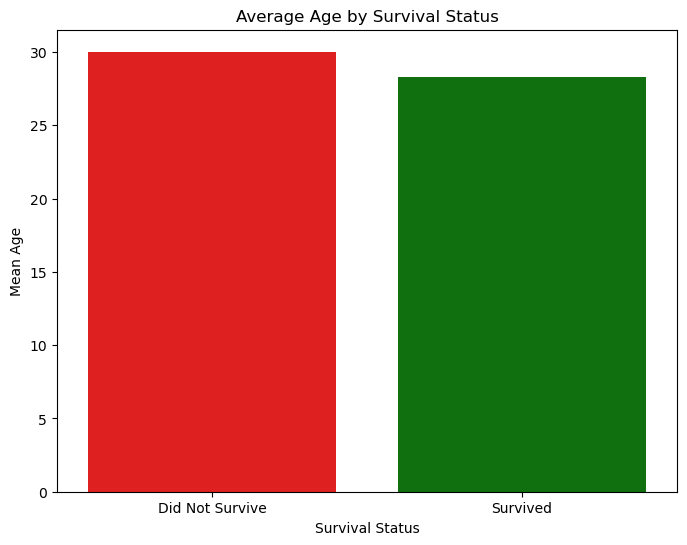

In [37]:
# Agrupar os dados por 'Survived' e calcular a idade média
mean_age_by_survival = df.groupby('Survived')['Age'].mean()

# Cores diferenciadas para cada barra
colors = ['red', 'green']  # 'Did Not Survive' -> red, 'Survived' -> green

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_age_by_survival.index, y=mean_age_by_survival.values, palette=colors)

# Customizar o gráfico
plt.title('Average Age by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Mean Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  # Customizar rótulos do eixo x

# Mostrar o gráfico
plt.show()


Outra curiosidade era em divisã de rapazes e raparigas. Quantos sobreviveram ? Tentei calcular isso com a coluna sex do dataset e surviveed. talvez houvesse mais homens que mulheres no navio e faleceram mais do que as mulheres. 

<Figure size 1000x600 with 0 Axes>

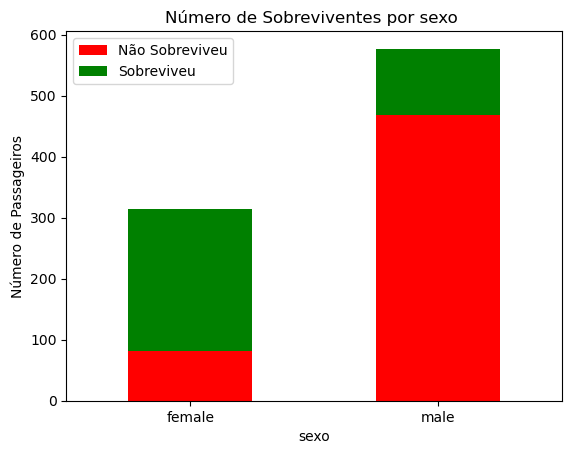

In [38]:
# Contar o número de sobreviventes e não sobreviventes por gênero
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind='bar', stacked=True, color=['red', 'green'])

# Personalizar o gráfico
plt.title('Número de Sobreviventes por sexo ')
plt.xlabel('sexo')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)  # Não girar os rótulos do eixo x
plt.legend(['Não Sobreviveu', 'Sobreviveu'])

# Mostrar o gráfico
plt.show()


Medi por tamanho de família (cálculo anterior) e quis ver graficamente como se comportava e achei curioso morreram mais pessoas que foram sozinhas na viagem do que famílias. Se juntar as famílias mortas nao cobre a coluna dos solteiros. Ou seja,tentaram salvar-se as famílias de 1,2,3 pesssoas juntas ultrapassam a coluna de salvos de zero. 

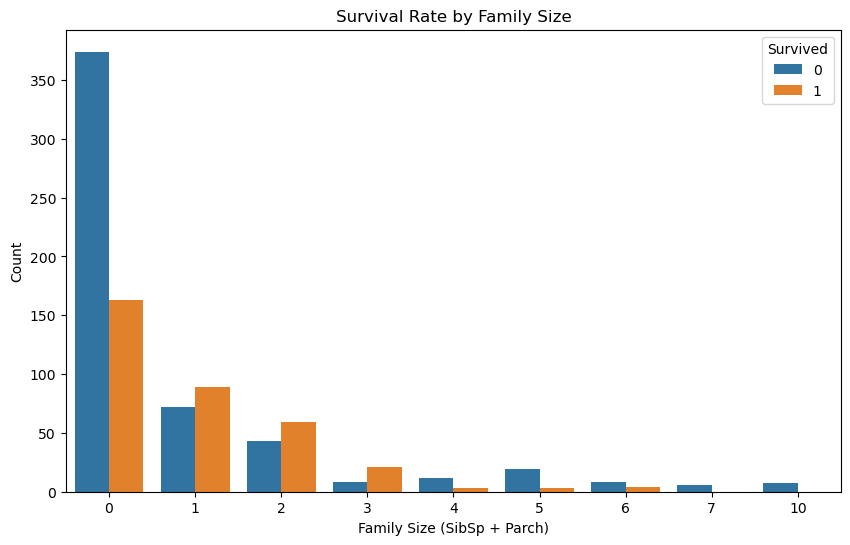

In [39]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Plot survival rate by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()


Vendo tudo isto, fiquei a pensar que correlações têm estes dados e fizemos um heatmap para saber. 
fare+ survieved = 0.26
fare + familysize + parch=0.22
familysize+sibsp =0.89
familysize+parch=0.78
parch+sibsp=0.41

São os valores mais elevados da relação que foram detetados. 

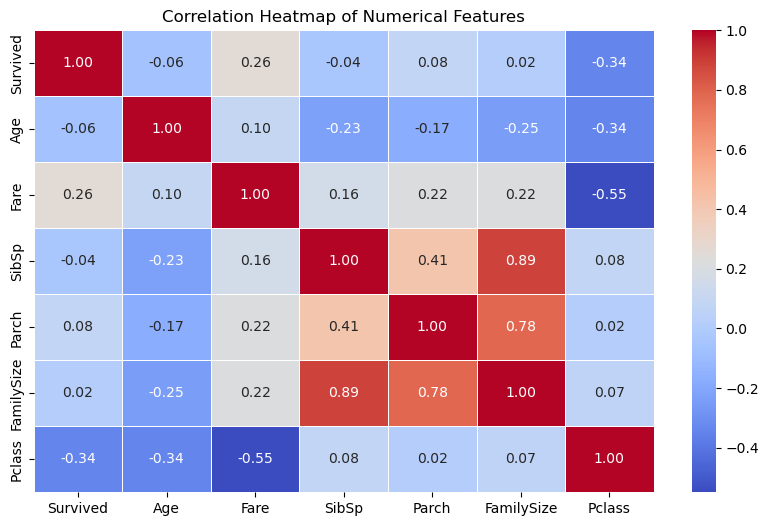

In [40]:
# Ensure the columns you're using are numeric (convert if necessary)
numerical_features = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Pclass']

# Convert columns to numeric (if necessary) and handle errors (ignore non-numeric values)
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

# Optionally: Handle missing values in numerical columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Create the correlation matrix
corr = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



Cálculei a média, mediana e desvio padrão da idade para ter uma noção mais exata da amplitude da variável, caso a queira usar mais tarde.

In [41]:
# Estatísticas para Idade
mean_age = df["Age"].mean()
median_age = df["Age"].median()
std_age = df["Age"].std()

print(f"Média da idade: {mean_age:.2f}")
print(f"Mediana da idade: {median_age:.2f}")
print(f"Desvio padrão da idade: {std_age:.2f}")


Média da idade: 29.36
Mediana da idade: 28.00
Desvio padrão da idade: 13.02


Cálculei também os mesmos parâmetros da variável survived, tenciono trabalhar com ela a seguir. 

In [42]:
# Mean
mean_survived = df['Survived'].mean()

# Median
median_survived = df['Survived'].median()

# Standard Deviation
std_dev_survived = df['Survived'].std()

print(f"Mean: {mean_survived}")
print(f"Median: {median_survived}")
print(f"Standard Deviation: {std_dev_survived}")


Mean: 0.3838383838383838
Median: 0.0
Standard Deviation: 0.4865924542648585


<--------------------------------------------------MACHINE LEARNING----------------------------------------------------------------------------------->

Nesta secção o objetivo é usar modelos de machine learning para que possam através de treino prever dados que nos possam ajudar a responder a nossa pergunta inicial. Para isso, vamos fazer uma cópia do dataframe para trabalhar com ela sem danificar o trabalho até agora. 

In [43]:
# Criando uma cópia do DataFrame
df_copy = df.copy()

# Mostrando o DataFrame original e a cópia
print("DataFrame original:")
print(df)

print("\nCópia do DataFrame:")
print(df_copy)

DataFrame original:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0    

Após a cópia do dataframe, vamos ter de o preparar para aplicar os modelos de machine learning. Para isso, remmovemos os valores omissos porque só iriam confundir o modelo, e definimos o x ou variavel de resposta e colcamos em binario ou seja 1 surbive e 0 did not survive e eliminamsos a categoria survie and did not sdsurvive do dataset. Se houve mais colunas categorizadas serão transformadas em binário com enconding. Como títle,sex, embarked.
Normalização das variáveis em vaiáveis numéricas para facilitar a criação dos dataframe de teste e treino. A machine learn só lê binários é a sua linguagem. 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Garantindo que df_copy tenha a coluna 'Title' extraída previamente
# Se você não tiver extraído o título, pode precisar fazer isso antes

# Exemplo de pré-processamento
# Supondo que 'Survived' seja o rótulo e todas as outras colunas sejam características

# Limpeza de dados (removendo valores ausentes ou fazendo imputação)
df_copy = df_copy.dropna()  # ou df_copy.fillna(df_copy.mean(), inplace=True)

# Separar a variável de resposta (rótulo) e as características (features)
X = df_copy.drop('Survived', axis=1)  # Excluir a coluna 'Survived' para características
y = df_copy['Survived']  # Variável target (rótulo)

# Se houver colunas categóricas, como 'Title', 'Sex', 'Embarked', use one-hot encoding ou label encoding
X = pd.get_dummies(X, drop_first=True)  # Um-hot encoding para colunas categóricas

# Normalizar os dados, caso necessário
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normaliza as variáveis numéricas

Neste passo, tive de gravar antes do run, dividi o dataframe cópia em x_train Y_train e X_test y_test, treinei o modelo e testei o mesmo com o primeiro e foi bastante preciso.'

In [45]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

Fiz a métrica de precisão e de recalll do modelo o que mostra que não erra muito nas previsões dele e que o seu desempenho é bom.

In [47]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precisão: {precision:.2f}")

Precisão: 0.83


In [48]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 0.68


A curva de ROC serve para saber se um modelo está mais adequado aos dados quanto mais a linha se aproxima do canto esquerdo, creio que é quase perfeito.

AUC-ROC: 0.88


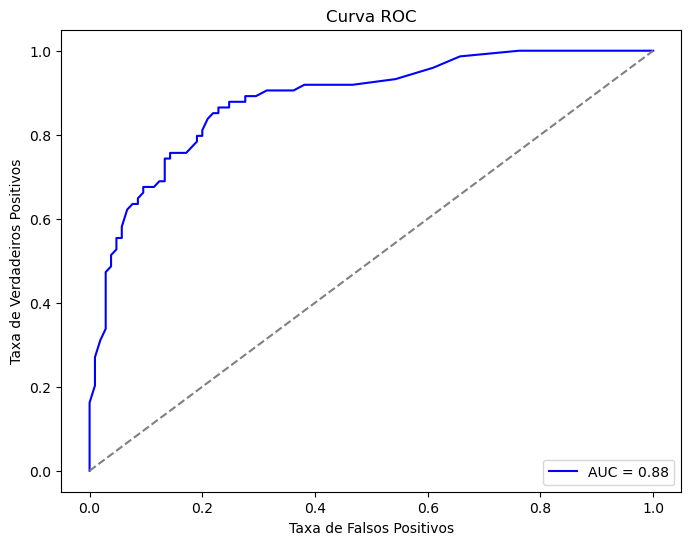

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obter as probabilidades da classe positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular o AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



Aqui está uma avaliação mais completa do primeiro modelo e parece ser o mais adequado. conseigo ver os dados com clareza. 

In [50]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Exibir o relatório de classificação e a matriz de confusão
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 81.01%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[95 10]
 [24 50]]


Accuracy: 0.81
Precision: 0.83
Recall: 0.68
F1 Score: 0.75


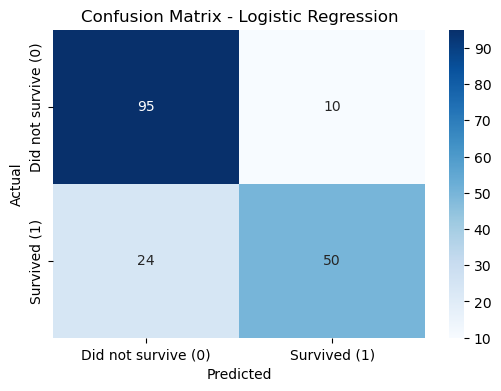

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Dados da matriz de confusão (manual ou do modelo)
cm = [[95, 10],
      [24, 50]]

# Cálculo de métricas
# Convertendo cm para elementos
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

accuracy = (tp + tn) / (tn + fp + fn + tp)  # Acurácia
precision = tp / (tp + fp)                 # Precisão
recall = tp / (tp + fn)                    # Recall
f1 = 2 * (precision * recall) / (precision + recall)  # F1-Score

# Exibindo as métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualizar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive (0)', 'Survived (1)'], yticklabels=['Did not survive (0)', 'Survived (1)'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Este modelo mostra que 95 das pessoas sobrveviventes realmente estavam vivas e que 24 estavam afinal mortas (falso positivo) e que 10 estavam mortas e 50 dadas como mortas afinal estvam vivas, dificuldade do modelo em contabilizar os mortos. 

Crio o modelo, treino e testo o mesmo. Além de usar técnicas de avaliação do mesmo e estão muito semelhantes em termos de resultados. Portanto tanto um modelo como o outro eram bons para este conjunto de dados. 

Logistic Regression Accuracy: 78.77%

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       105
           1       0.89      0.55      0.68        74

    accuracy                           0.79       179
   macro avg       0.82      0.75      0.76       179
weighted avg       0.81      0.79      0.78       179

Confusion Matrix:
[[100   5]
 [ 33  41]]


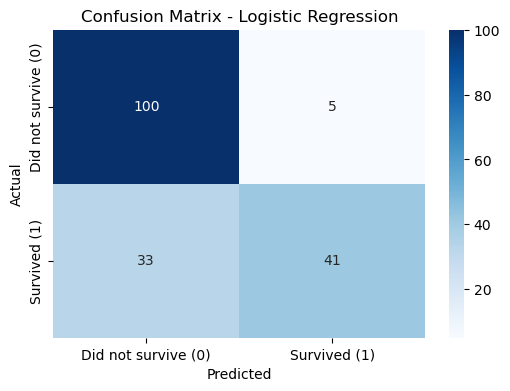

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Criar o modelo
log_reg = LogisticRegression()

# Treinar o modelo
log_reg.fit(X_train, y_train)

# Fazer previsões
y_pred_log_reg = log_reg.predict(X_test)
# Avaliar o modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%")
# Relatório de classificação
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
# Calcular a matriz de confusão
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(cm_log_reg)

# Visualizar a matriz de confusão com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_log_reg, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=['Did not survive (0)', 'Survived (1)'], 
    yticklabels=['Did not survive (0)', 'Survived (1)']
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Pelo gráfico de matrix podemos ver a precisão deste modelo e é o melhor a ser usado sem dúvida. O grau de falsos negativos e falsos positivos é muito menor do que no modelo anterior. Poderá indicar uma melhor adequação do modelo.

Não sabemos ao certo o que deu sorte a quem sobreviveu, sabemos que foram um conjunto de variáveis como a idade, família e lugar onde estavam sentados e categoria. MAs a probabilidade de sobreviver era realtivamente pequena e quem o conseguiu teve muita sorte! Os modelos de machine learning podem explicar parte, mas não o todo desse porquê, pela falta de variáveis e fatores. Assim, o mistério continua....

In [ ]:
print("I turn MSUD2 and COOLER to CODE ")
print("FINNNISH PROGRAM")